In [110]:
import numpy as np
import pandas as pd
import re

In [111]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [112]:
df = pd.read_csv('/content/drive/MyDrive/A/gurgaon_properties_cleaned_v1 (1).csv')

In [113]:
df.shape

(3803, 17)

In [114]:
df.head(1)
# focus on ->areawithtype,additionlroom,agepossession,furnishdetails,feature

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']"


# Areawithtype

In [115]:
df[['area','areaWithType']]

,area,areaWithType
0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)
1,1105.0,Carpet area: 1103 (102.47 sq.m.)
2,58228.0,Carpet area: 58141 (5401.48 sq.m.)
3,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.)
4,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476...
...,...,...
3798,583.0,Super Built up area 583(54.16 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.)
3799,6228.0,Plot area 692(578.6 sq.m.)
3800,735.0,Super Built up area 735(68.28 sq.m.)
3801,5490.0,Plot area 610(510.04 sq.m.)


In [116]:
# df.insert(loc = 2, column='super_built_up_area',value=df['areaWithType'])
# df.insert(loc =3, column='built_up_area',value=df['areaWithType'])
# df.insert(loc =4, column='carpet_area',value=df['areaWithType'])

In [117]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [118]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [119]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [120]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']"


In [121]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [122]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0


In [123]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1771,4.79,flat,4119.0,Super Built up area 4115(382.3 sq.m.),4115.0,NaN,NaN
3034,1.71,flat,1425.0,Built Up area: 1423 (132.2 sq.m.),NaN,1423.0,NaN
6,7.50,flat,5350.0,Super Built up area 5350(497.03 sq.m.),5350.0,NaN,NaN
1541,3.30,house,1242.0,Plot area 138(115.39 sq.m.),NaN,NaN,NaN
2876,0.58,flat,950.0,Super Built up area 950(88.26 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.)Carpet area: 744 sq.f...,950.0,900.0,744.0


In [124]:
df.duplicated().sum()

122

In [125]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [126]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.2,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq.ft. (78.6 sq.m.),NaN,846.0,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [127]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [128]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [129]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [130]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [131]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [132]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN


In [133]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [134]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [135]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,3042.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN


In [136]:
df.update(all_nan_df)

In [137]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [138]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Interne...",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT U...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global Sch...",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', ...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtain...","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com...",1995.0,1615.0,1476.0


2. **Additionalroom**

In [139]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
store room,99
"study room,servant room",99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [140]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [141]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1298,not available,0,0,0,0,0
1008,not available,0,0,0,0,0
3610,not available,0,0,0,0,0
3602,pooja room,0,0,0,1,0
101,"pooja room,servant room,study room,store room",1,1,1,1,0


In [142]:
df.sample(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
1281,house,bptp astaire gardens,sector 70a,1.18,8137.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,others,2.0,North-East,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd...","['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '13 Light', '1 Chimney', '1 Modular Kitchen', '5 AC'...","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally...",NaN,NaN,1450.0,0,0,0,0,1


**agepossession**

In [143]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"


In [144]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [145]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [146]:
df.head(1)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0


**furnishdetails**

In [147]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2693,[],NaN
2090,[],NaN
140,NaN,['Water Storage']
2730,NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Visit..."
1599,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '12 Light', '5 AC', '1 Chimney',...","['Security / Fire Alarm', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifi..."


In [148]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]
furnishings_df.shape

(3803, 19)

In [149]:
furnishings_df.shape

(3803, 19)

In [150]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-150-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [151]:
furnishings_df.sample(5)

,Modular Kitchen,Bed,Geyser,Exhaust Fan,Sofa,Chimney,Microwave,Water Purifier,Fridge,TV,Curtains,Fan,Wardrobe,Washing Machine,Light,Dining Table,AC,Stove
3713,1,0,5,0,0,1,1,0,0,0,0,5,0,0,21,0,5,0
2024,1,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0
750,1,0,1,1,0,1,0,0,0,0,3,3,2,0,1,0,0,0
558,1,0,2,1,0,0,0,1,0,0,1,5,2,0,6,0,0,0
3284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)


In [154]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

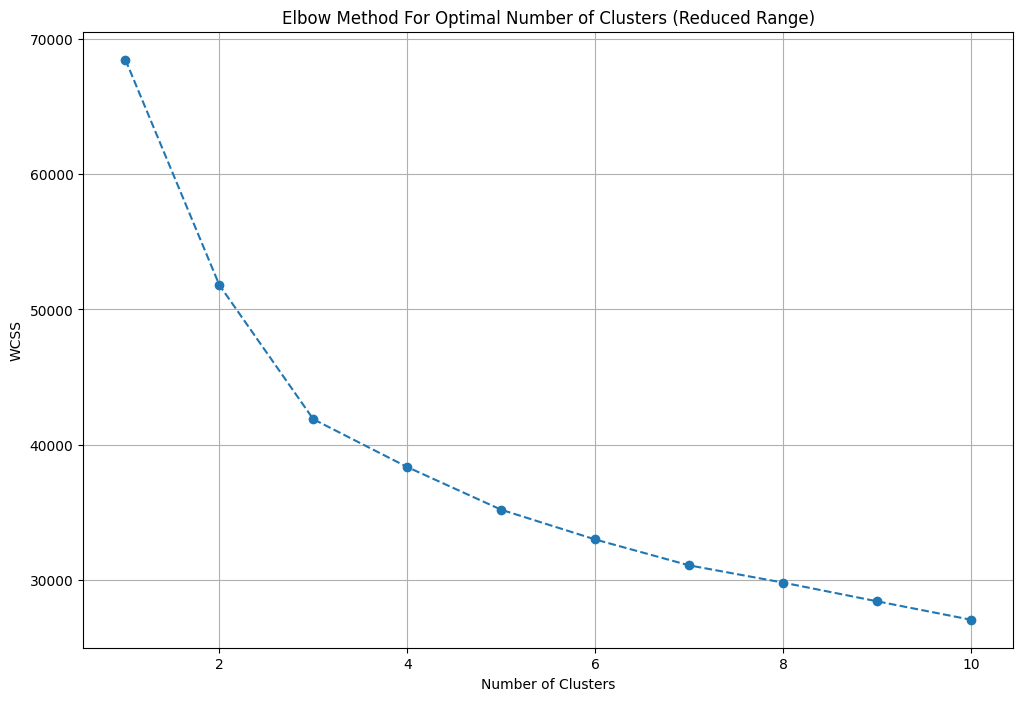

In [155]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [156]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [157]:
df = df.iloc[:,:-18]


In [158]:
df['furnish_type'] = cluster_assignments

In [159]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnish_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,2


**Features**

In [165]:
df[['society','features']]

,society,features
0,signature global park 4,"['Lift(s)', 'Park']"
1,smart world gems,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Interne..."
2,pyramid elite,"['Intercom Facility', 'Lift(s)', 'Park']"
3,breez global hill view,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint..."
4,bestech park view sanskruti,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com..."
...,...,...
3798,pivotal devaan,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', ..."
3799,international city by sobha phase 1,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com..."
3800,ansal api celebrity suites,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', ..."
3801,independent,"['Private Garden / Terrace', 'Water purifier', 'False Ceiling Lighting', 'Water Storage', 'Natur..."


In [186]:
app_df = pd.read_csv('/content/drive/MyDrive/A/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Stat...","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park...",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'pr...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club ..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific ...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Pal...",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,...","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading..."


In [187]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [188]:
temp_df = df[df['features'].isnull()]

In [189]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [190]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [191]:
features_binary_df.sample(5)

,Airy Rooms,Bank Attached Property,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,High Ceiling Height,Intercom Facility,Internet/wi-fi connectivity,Lift(s),Low Density Society,Maintenance Staff,Natural Light,No open drainage around,Park,Piped-gas,Power Back-up,Private Garden / Terrace,Rain Water Harvesting,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Shopping Centre,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier,Water softening plant
987,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1
2033,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2805,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3258,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0
2793,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [192]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

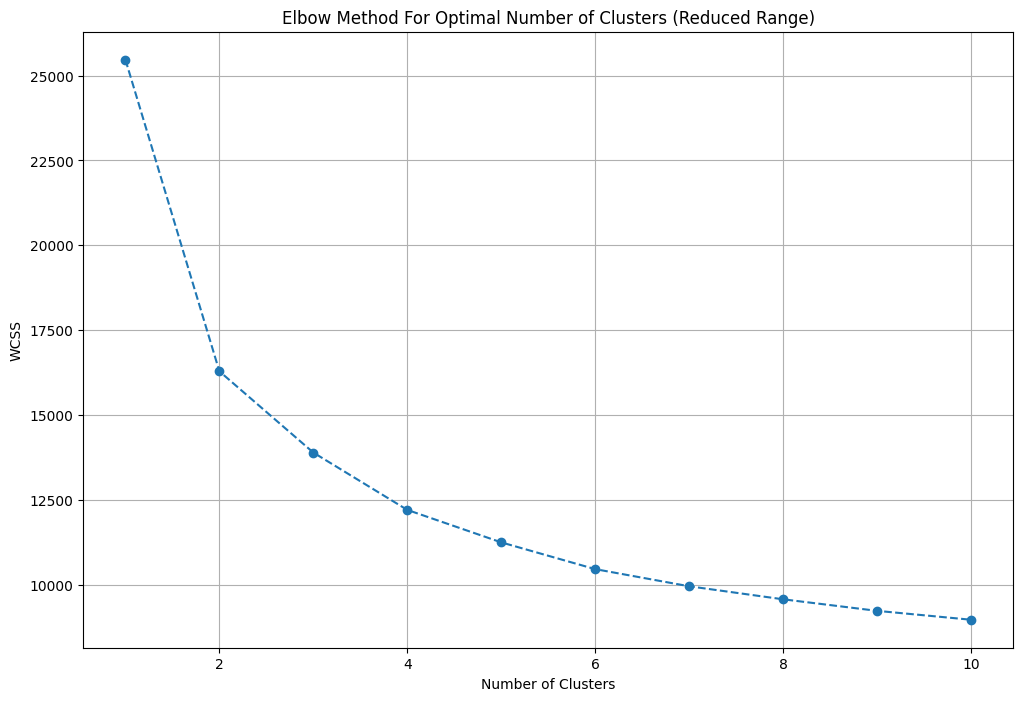

In [193]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [194]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}


In [195]:
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

KeyError: '[\'24/7 Power Backup\', \'24/7 Water Supply\', \'24x7 Security\', \'ATM\', \'Aerobics Centre\', \'Amphitheatre\', \'Badminton Court\', \'Banquet Hall\', \'Bar/Chill-Out Lounge\', \'Barbecue\', \'Basketball Court\', \'Billiards\', \'Bowling Alley\', \'Business Lounge\', \'CCTV Camera Security\', \'Cafeteria\', \'Car Parking\', \'Card Room\', \'Changing Area\', "Children\'s Play Area", \'Cigar Lounge\', \'Clinic\', \'Club House\', \'Concierge Service\', \'Conference room\', \'Creche/Day care\', \'Cricket Pitch\', \'Doctor on Call\', \'Earthquake Resistant\', \'Entrance Lobby\', \'Fire Fighting Systems\', \'Flower Garden\', \'Food Court\', \'Foosball\', \'Football\', \'Fountain\', \'Gated Community\', \'Golf Course\', \'Grocery Shop\', \'Gymnasium\', \'High Speed Elevators\', \'Infinity Pool\', \'Internal Street Lights\', \'Jacuzzi\', \'Jogging Track\', \'Landscape Garden\', \'Laundry\', \'Lawn Tennis Court\', \'Library\', \'Lounge\', \'Manicured Garden\', \'Medical Centre\', \'Milk Booth\', \'Mini Theatre\', \'Multipurpose Court\', \'Multipurpose Hall\', \'Natural Pond\', \'Party Lawn\', \'Piped Gas\', \'Pool Table\', \'Power Back up Lift\', \'Property Staff\', \'RO System\', \'Reading Lounge\', \'Restaurant\', \'Salon\', \'Sauna\', \'Sewage Treatment Plant\', \'Skating Rink\', \'Solar Lighting\', \'Solar Water Heating\', \'Spa\', \'Squash Court\', \'Steam Room\', \'Sun Deck\', \'Temple\', \'Theatre\', \'Toddler Pool\', \'Valet Parking\', \'Video Door Security\', \'Water Softener Plant\', \'Yoga/Meditation Area\'] not in index'

In [196]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)